# Problema 4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Primero leemos los datos y los acomodamos en un dataframe de pandas

In [ ]:
# Leemos los datos
import pandas as pd
import numpy as np

file_path = '/content/drive/MyDrive/Reconocimiento Estadístico de Patrones /oef2.data'
df = pd.read_csv(file_path, header=None, delim_whitespace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.columns = names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df.head()

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,-3.9,-4.5,-2.3,1.2,5.4,10.9,15.5,15.3,11.6,6.9,3.4,-1.5
1,-7.1,-7.5,-3.1,2.3,8.5,14.5,18.3,17.8,13.5,8.1,2.9,-3.9
2,-6.0,-6.1,-1.6,3.3,9.2,14.8,18.2,18.1,13.8,8.6,3.4,-2.9
3,-4.7,-5.9,-2.5,2.0,7.4,13.2,17.7,17.6,13.5,8.4,3.8,-1.8
4,-2.7,-3.2,0.3,4.7,9.2,13.4,16.3,16.4,13.6,9.5,5.2,-0.3


A continuación revisamos brevemente los datos, calculando alguno valores estadístico por columna, como lo son la media, la desviación estandar y algunos valores de cuantiles.

In [ ]:
# Vistazo a los datos
desc_stats = df.describe()
print('Descriptive statistics:\n', desc_stats)

Descriptive statistics:
            Enero    Febrero      Marzo     Abril       Mayo      Junio  \
count  35.000000  35.000000  35.000000  35.00000  35.000000  35.000000   
mean  -14.171429 -11.842857  -6.942857   0.90000   7.974286  13.431429   
std     9.654672   9.236255   8.636015   7.08258   5.245578   4.050474   
min   -32.100000 -33.200000 -31.400000 -23.10000 -10.900000  -0.600000   
25%   -21.100000 -16.350000  -9.850000   0.40000   7.500000  12.900000   
50%   -12.100000 -10.800000  -4.500000   3.20000   9.300000  14.100000   
75%    -6.650000  -6.100000  -2.050000   4.50000  10.950000  15.900000   
max     4.100000   5.800000   6.700000   9.10000  14.100000  18.300000   

           Julio     Agosto  Septiembre    Octubre  Noviembre  Diciembre  
count  35.000000  35.000000   35.000000  35.000000  35.000000  35.000000  
mean   16.442857  15.354286   10.454286   4.368571  -3.400000 -10.625714  
std     3.590042   3.702491    4.355074   5.702464   7.734339   8.962023  
min     

Me parecío útil visualizar el histograma de la distribución de las temperaturas a lo largo de cada estación para cada mes del año, como era de esperarse para cierto meses las temperaturas oscilan alrededor del cero (invierno), mientras que para otros lo hacen en temperaturas más elevadas (verano).

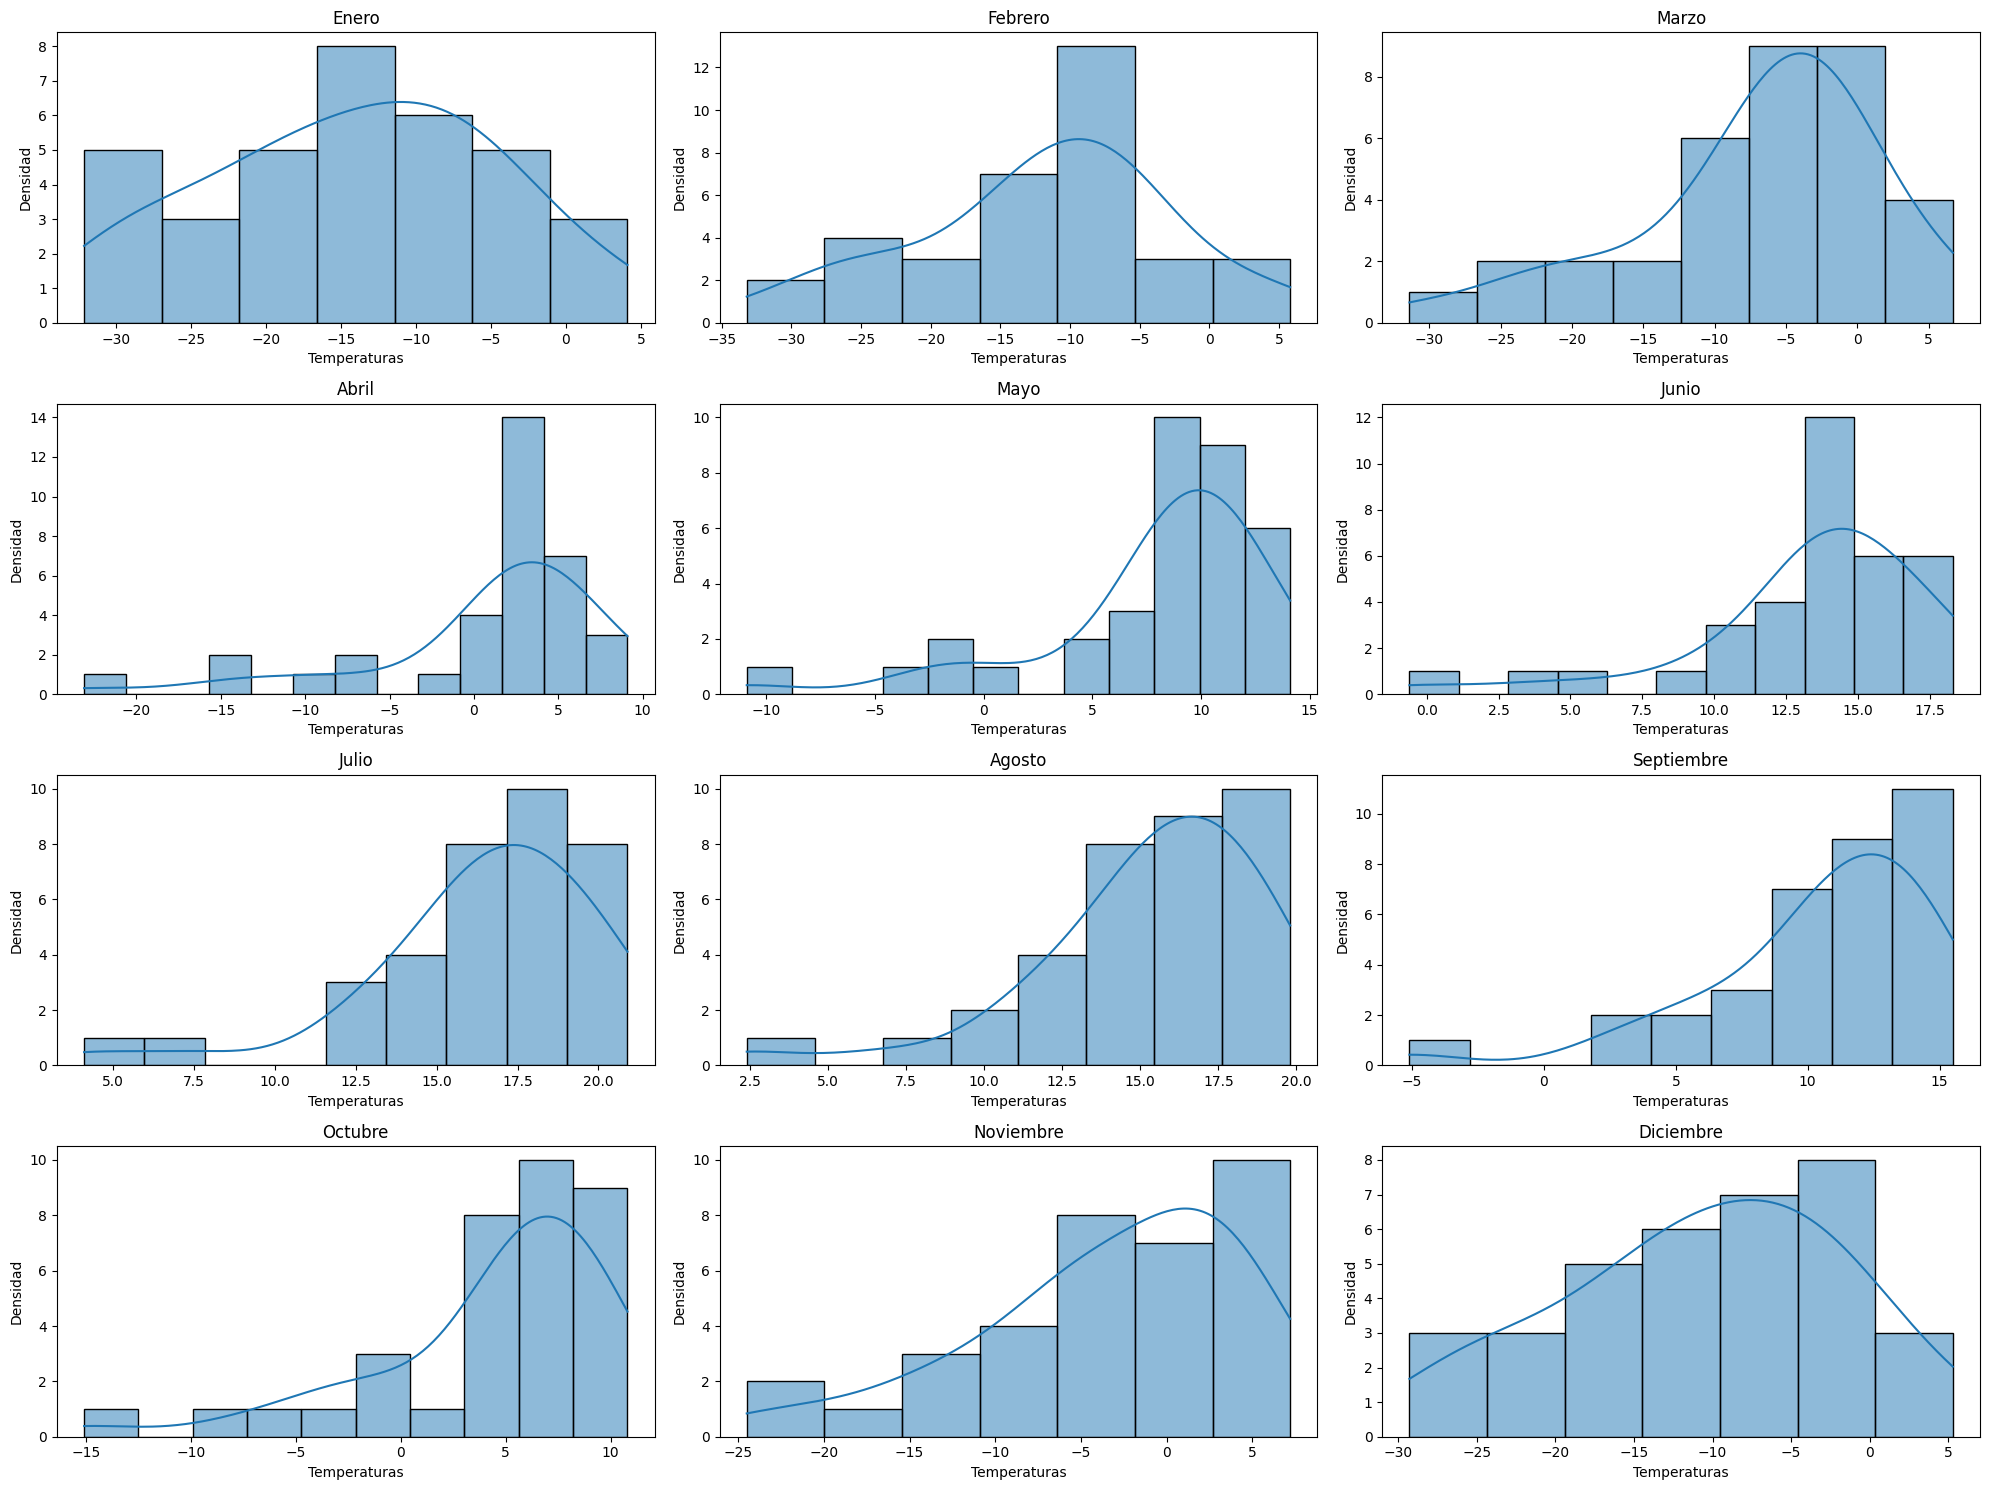

In [ ]:
# Breve visualización
# --> Visualizamos las temperaturas a lo largo de cada estación para cada mes
import seaborn as sns
import matplotlib.pyplot as plt

rows, columns = 4, 3
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
  ax = plt.subplot(rows, columns, i)
  sns.histplot(df[column], kde=True, ax=ax)
  ax.set_title(f'{column}')
  ax.set_xlabel('Temperaturas')
  ax.set_ylabel('Densidad')

plt.tight_layout()
plt.show()

Otra visualización que me parecio interesante fue graficar los cambios en la temperatura a lo largo del año para cada estación, como era de esperarse hay un aumento en el verano, pero lo que es interesante es que para algunas estaciones este cambio es más abrupto que para otras.

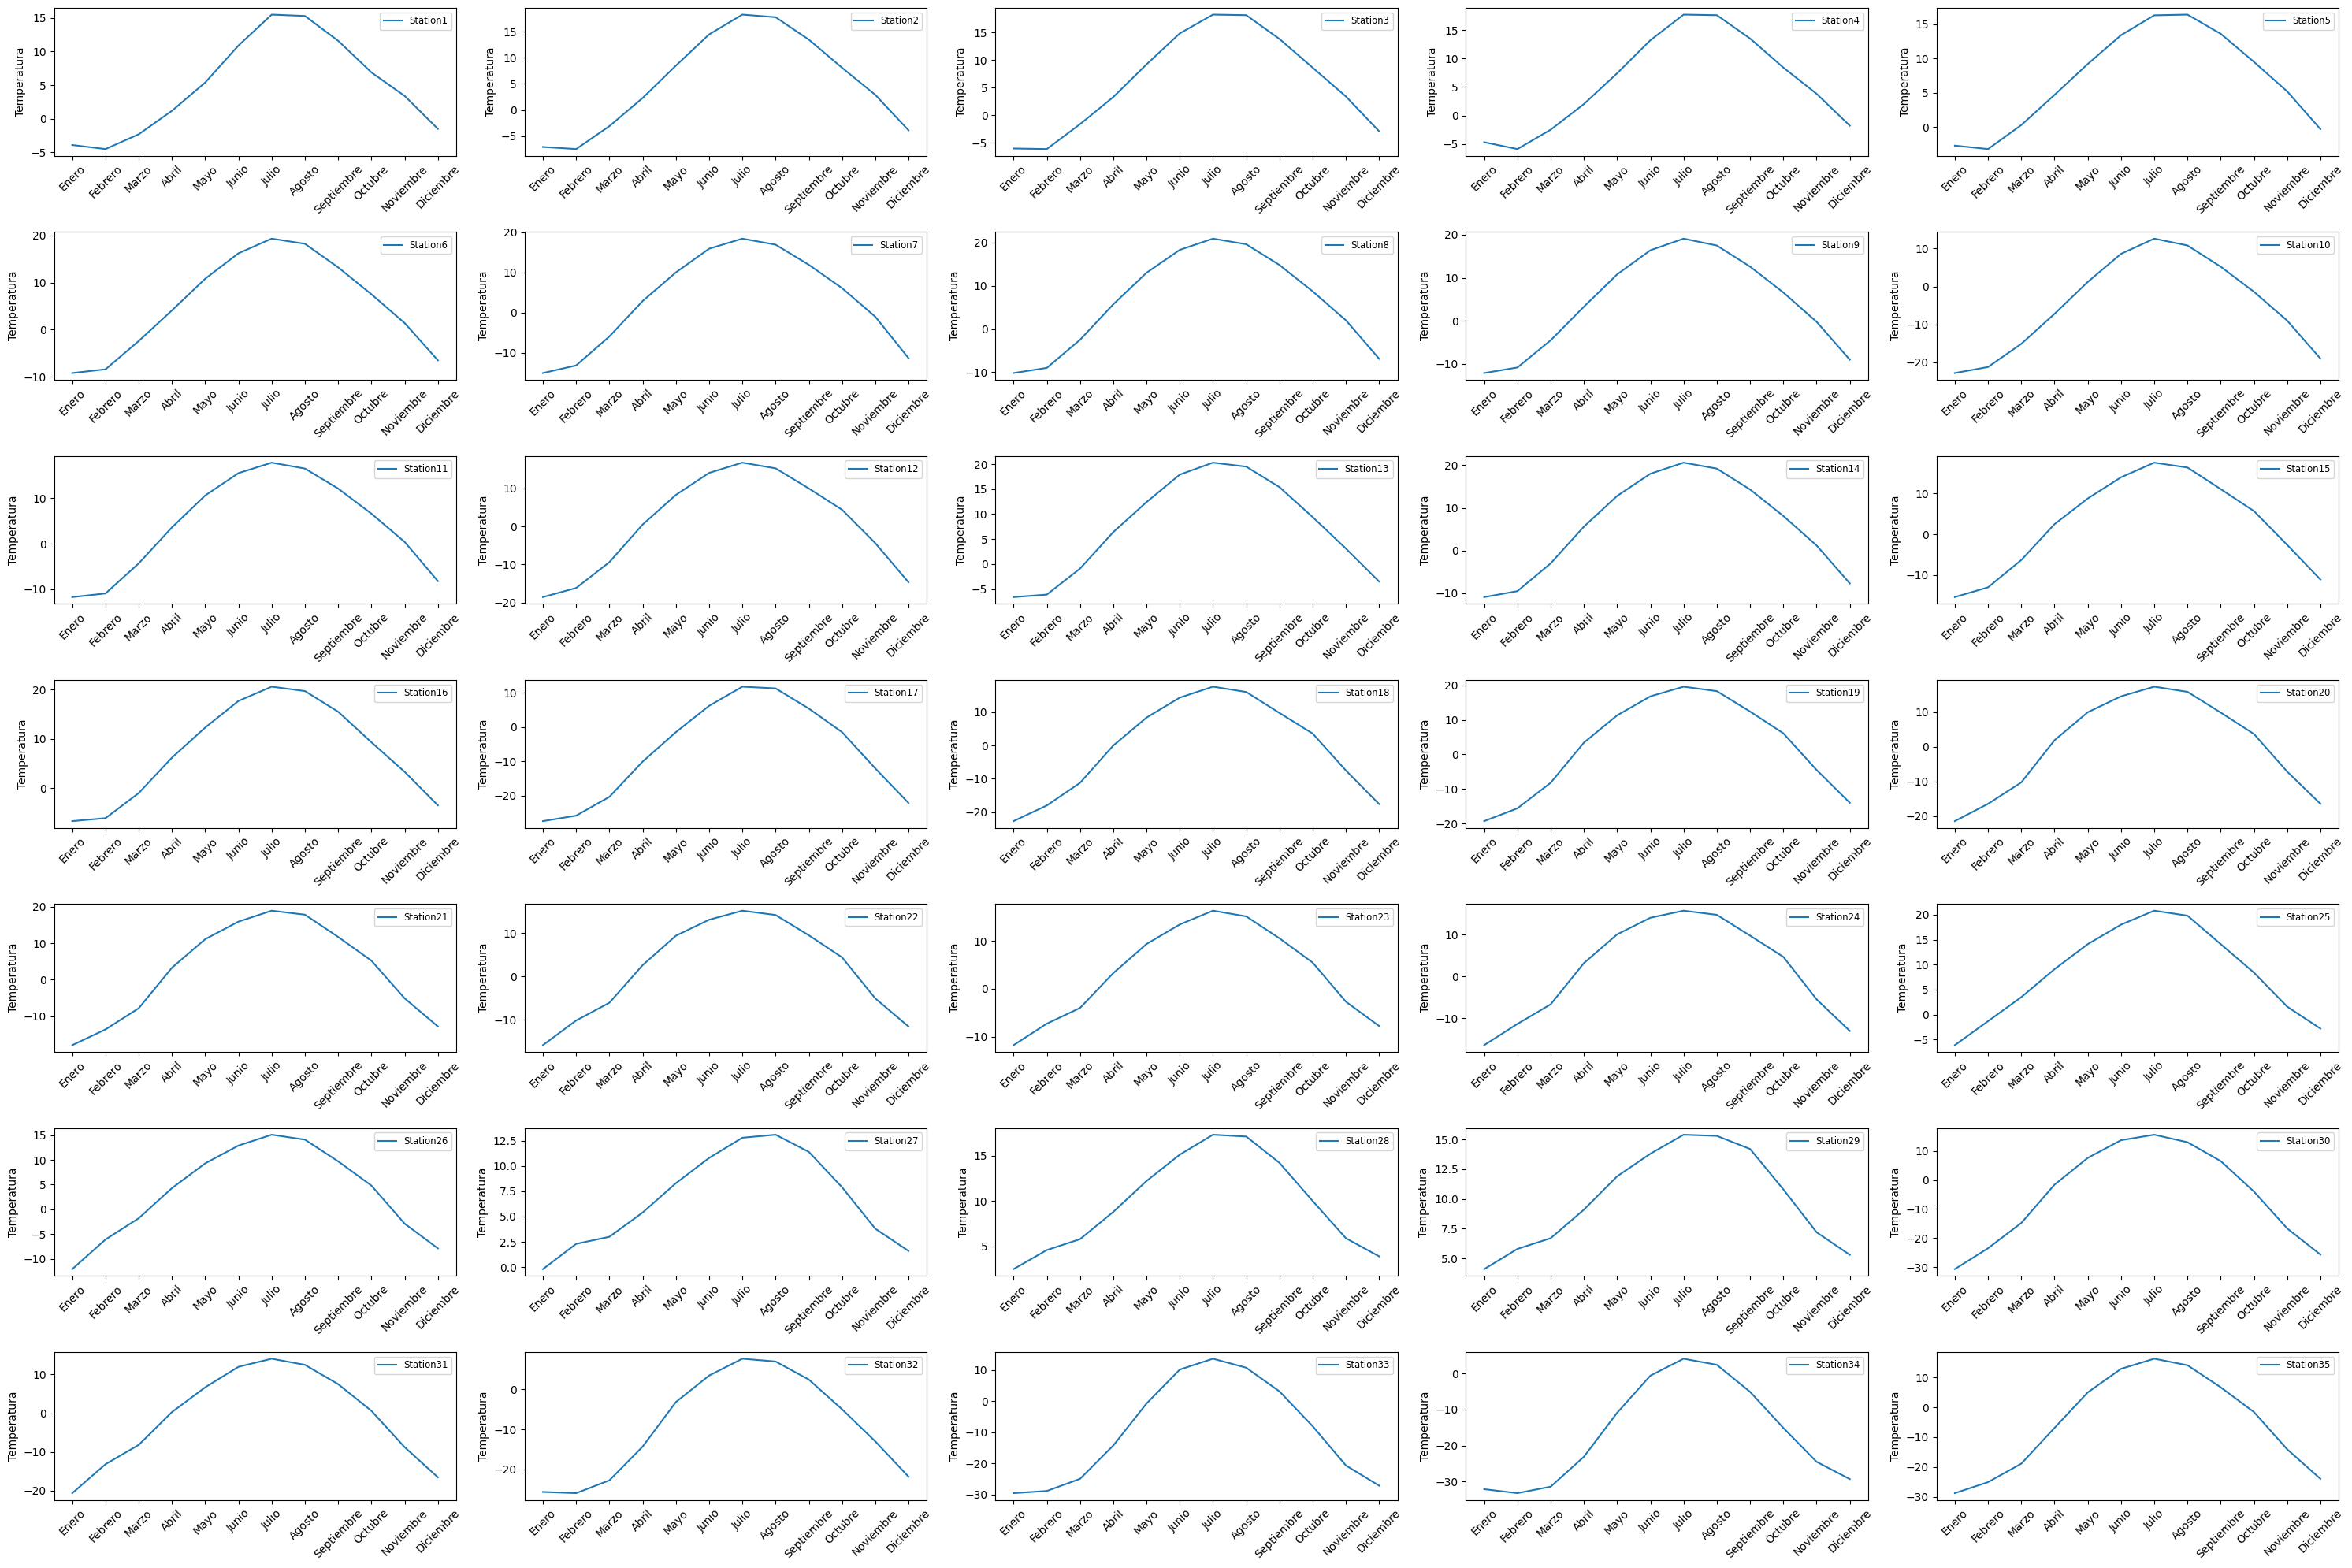

In [ ]:
# --> Visualizamos la gráfica de como varía la temperatura
# a lo largo del año para cada estación

rows, columns = 7, 5
months = df.columns
plt.figure(figsize=(30, 20))
for i, row in df.iterrows():
  ax = plt.subplot(rows, columns, i+1)
  plt.plot(months, row, label=f'Station{i+1}')
  ax.set_ylabel('Temperatura')
  ax.legend(loc='best', fontsize='small')
  plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

Para detectar posibles outliers en las temperaturas para cada mes del año, presentamos unos boxplots que nos permiten detectar datos atípicos para meses como Abril, Mayo o Octubre.

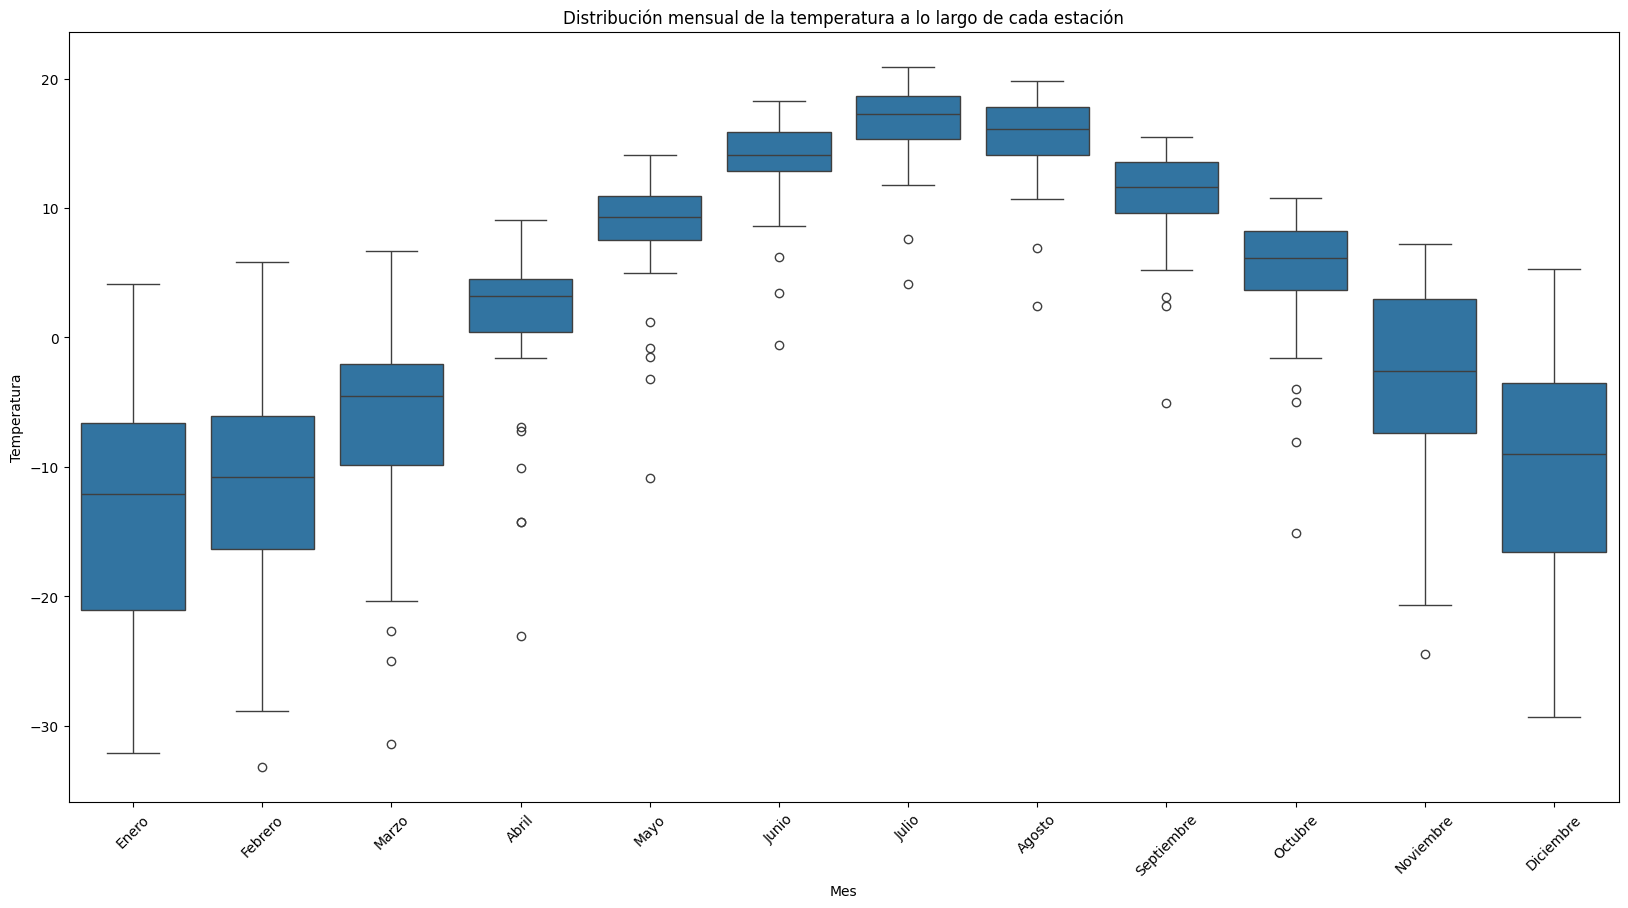

In [ ]:
# --> Boxplots para detectar distribuciones y outliers
plt.figure(figsize=(20, 10))

df_melted = df.melt(var_name='Mes', value_name='Temperatura')
sns.boxplot(x='Mes', y='Temperatura', data=df_melted)

plt.title('Distribución mensual de la temperatura a lo largo de cada estación')
plt.xlabel('Mes')
plt.ylabel('Temperatura')
plt.xticks(rotation=45)
plt.show()

Por último, un mapa de calor para visualizar meses más calientes o más fríos.

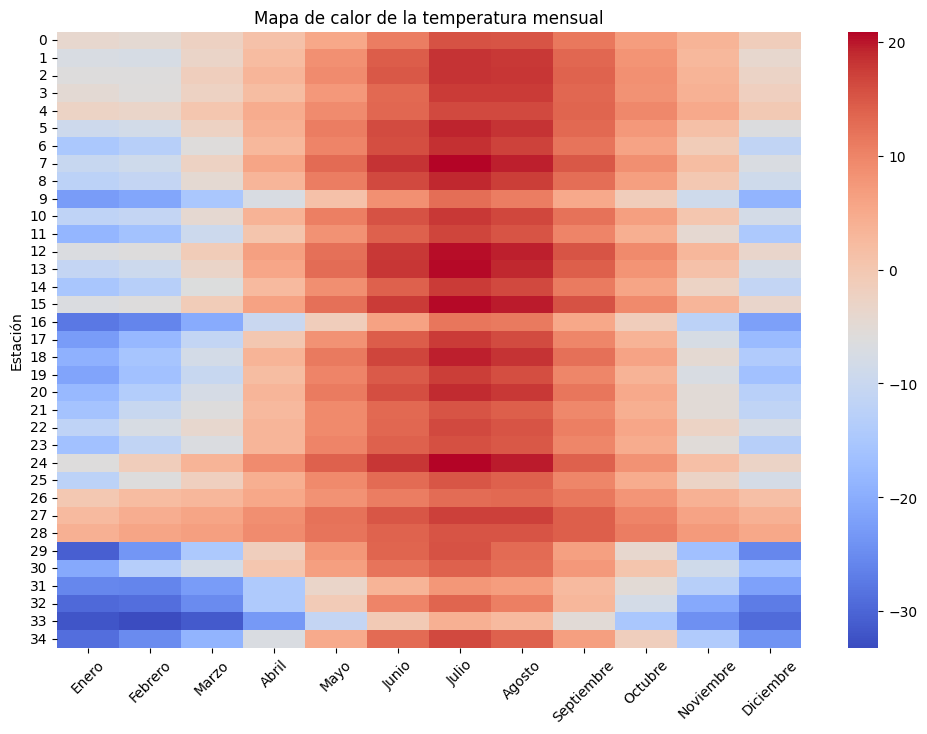

In [ ]:
# --> Por último un heatmap

plt.figure(figsize=(12, 8))

sns.heatmap(df, annot=False, cmap='coolwarm', fmt='.1f')
plt.title('Mapa de calor de la temperatura mensual')
plt.ylabel('Estación')
plt.xticks(rotation=45)
plt.show()

Previo a calcular componentes principales estandarizamos los datos, a continuación calculamos y mostramos los primeros dos componentes principales. Para el primer componente principal tenemos que no hay contrastes en las aportaciones de cada mes, con mayores contribuciones por parte de meses como Junio, Julio y Enero, Diciembre. El segundo componente si detecta contrastes entre los meses más calientes y los más fríos.

In [ ]:
# Aplicamos PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Primero estandarizamos los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Calculamos componentes principales
pca = PCA()
pca.fit(df_scaled)
principal_components_df = pd.DataFrame(data=pca.components_[:2,])
principal_components_df.columns = names
principal_components_df

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,-0.272493,-0.284019,-0.302411,-0.304361,-0.290697,-0.266367,-0.260056,-0.284345,-0.308649,-0.308325,-0.296004,-0.281263
1,0.388642,0.320689,0.177763,-0.051482,-0.246570,-0.419404,-0.440418,-0.313427,-0.086328,0.045089,0.221031,0.353023


Es interesante la siguiente gráfica porque en ella podemos visualizar como con apenas un componente principal se puede explicar más del 80% de la varianza y para dos componentes se alcanza poco más del 97%.

Varianza explicada:
 [8.48366091e-01 1.24310695e-01 1.85600716e-02 5.55380513e-03
 1.44258069e-03 8.30584241e-04 4.18196246e-04 2.65110257e-04
 1.11587744e-04 6.98658315e-05 3.88774466e-05 3.25346920e-05]
Varianza explicada acumulado:
 [0.84836609 0.97267679 0.99123686 0.99679066 0.99823324 0.99906383
 0.99948202 0.99974713 0.99985872 0.99992859 0.99996747 1.        ]


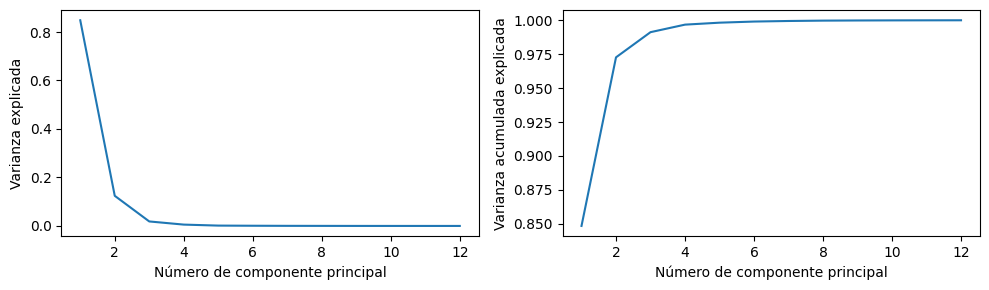

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance)

print('Varianza explicada:\n', explained_variance)
print('Varianza explicada acumulado:\n', cumulative_variance_ratio)

N = np.linspace(1, 12, 12, dtype=int)
plt.figure(figsize=(10, 3))

ax = plt.subplot(1, 2, 1)
plt.plot(N, explained_variance)
ax.set_xlabel('Número de componente principal')
ax.set_ylabel('Varianza explicada')

ax = plt.subplot(1, 2, 2)
plt.plot(N, cumulative_variance_ratio)
ax.set_xlabel('Número de componente principal')
ax.set_ylabel('Varianza acumulada explicada')

plt.tight_layout()
plt.show()

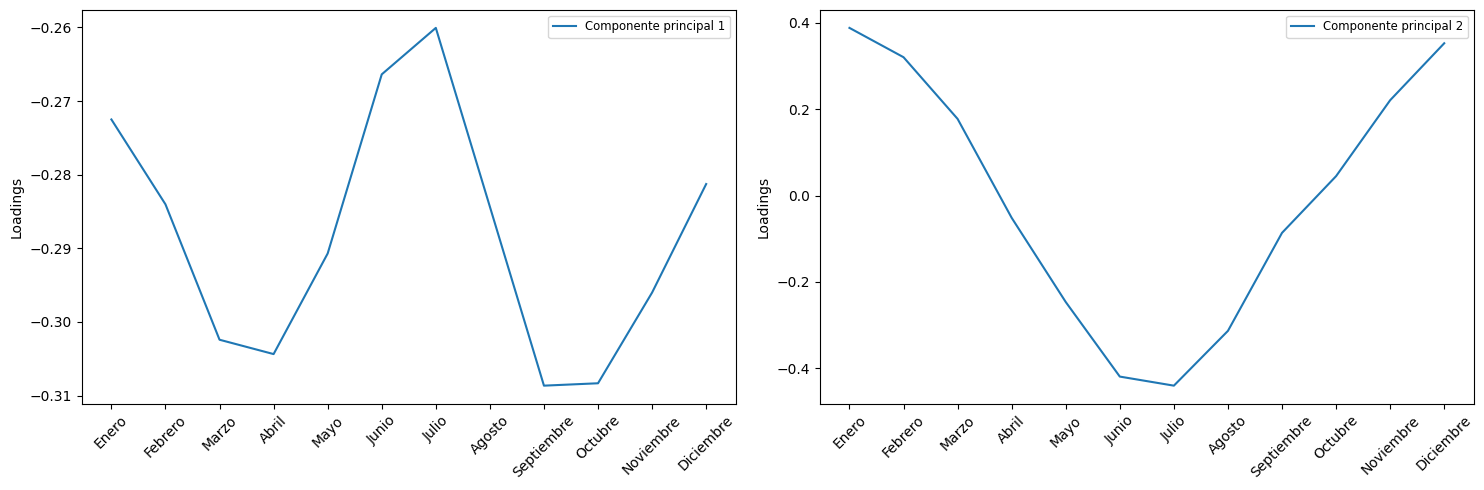

In [ ]:
rows, columns = 1, 2
months = df.columns
plt.figure(figsize=(15, 5))
for i, row in principal_components_df.iterrows():
  ax = plt.subplot(rows, columns, i+1)
  plt.plot(months, row, label=f'Componente principal {i+1}')
  ax.set_ylabel('Loadings')
  ax.legend(loc='best', fontsize='small')
  plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

En esta última gráfica podemos visualizar lo que ya habíamos comentado arriba, una mayor aporte y contraste entre los meses calientes y fríos.